In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'F:\project\train'
validation_dir = r'F:\project\validation'
test_dir = r'F:\project\test'

In [4]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# generating batches of tensor image data

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
              validation_dir,
              target_size = (150,150),
            batch_size = 20,
            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
# creating structure

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation = 'relu')) 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation = 'relu'))

model.add(layers.Dense(1, activation ='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
 from tensorflow.keras import optimizers
    
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [11]:
history = model.fit(
             train_generator,
              steps_per_epoch = 100,
              epochs = 20,
              validation_data = validation_generator,
               validation_steps =50)

Epoch 1/20
100/100 [==============================] - 46s 460ms/step - loss: 0.6912 - acc: 0.5360 - val_loss: 0.6846 - val_acc: 0.5170
Epoch 2/20
100/100 [==============================] - 51s 506ms/step - loss: 0.6636 - acc: 0.6000 - val_loss: 0.6588 - val_acc: 0.5780
Epoch 3/20
100/100 [==============================] - 51s 510ms/step - loss: 0.6305 - acc: 0.6405 - val_loss: 0.6190 - val_acc: 0.6470
Epoch 4/20
100/100 [==============================] - 51s 508ms/step - loss: 0.5740 - acc: 0.7050 - val_loss: 0.6135 - val_acc: 0.6480
Epoch 5/20
100/100 [==============================] - 49s 494ms/step - loss: 0.5459 - acc: 0.7205 - val_loss: 0.6472 - val_acc: 0.6290
Epoch 6/20
100/100 [==============================] - 49s 490ms/step - loss: 0.5206 - acc: 0.7370 - val_loss: 0.5797 - val_acc: 0.6960
Epoch 7/20
100/100 [==============================] - 47s 472ms/step - loss: 0.4906 - acc: 0.7575 - val_loss: 0.5702 - val_acc: 0.6980
Epoch 8/20
100/100 [==============================] - 4

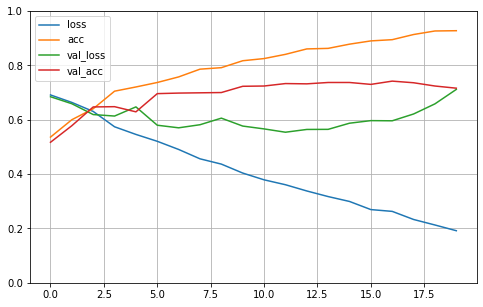

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.save("model.h5")

In [14]:
from tensorflow.keras import backend as K

K.clear_session()
del model


In [15]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range =40,
width_shift_range = 0.2,
height_shift_range =0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150,150),
batch_size =32,
class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150,150),
batch_size =32,
class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',
                       input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Conv2D(128,(3,3),activation = 'relu')) 
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation = 'relu'))

model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate = 1e-4),
             metrics=['acc'])

In [24]:
history = model.fit(
        train_generator,
        steps_per_epoch = 62,
        epochs =100,
    validation_data = validation_generator,
     validation_steps = 50)

Epoch 1/100
62/62 [==============================] - 43s 692ms/step - loss: 0.6613 - acc: 0.5960
Epoch 2/100
62/62 [==============================] - 43s 694ms/step - loss: 0.6575 - acc: 0.6128
Epoch 3/100
62/62 [==============================] - 43s 693ms/step - loss: 0.6479 - acc: 0.6331
Epoch 4/100
62/62 [==============================] - 43s 697ms/step - loss: 0.6428 - acc: 0.6153
Epoch 5/100
62/62 [==============================] - 43s 696ms/step - loss: 0.6229 - acc: 0.6545
Epoch 6/100
62/62 [==============================] - 43s 695ms/step - loss: 0.6190 - acc: 0.6540
Epoch 7/100
62/62 [==============================] - 44s 701ms/step - loss: 0.6102 - acc: 0.6621
Epoch 8/100
62/62 [==============================] - 49s 783ms/step - loss: 0.6054 - acc: 0.6601
Epoch 9/100
62/62 [==============================] - 44s 716ms/step - loss: 0.5922 - acc: 0.6692
Epoch 10/100
62/62 [==============================] - 44s 709ms/step - loss: 0.5941 - acc: 0.6850
Epoch 11/100
62/62 [=========

In [25]:
model.save("project_cnn.h5")

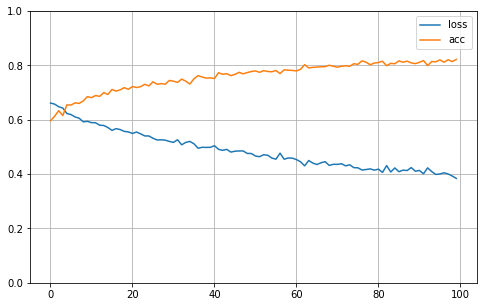

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [5]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range =40,
width_shift_range = 0.2,
height_shift_range =0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150,150),
batch_size =20,
class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150,150),
batch_size =20,
class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150,150,3))

In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# to add fully connected dense and output layer

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import optimizers 

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5","early_stop_model.h5")

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

In [15]:
history = model.fit(
          train_generator,
         steps_per_epoch = 100,
         epochs = 30,
         validation_data = validation_generator,
         validation_steps = 50,
         callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/30
100/100 [==============================] - 692s 7s/step - loss: 0.4058 - acc: 0.8145 - val_loss: 0.1714 - val_acc: 0.9300
Epoch 2/30
100/100 [==============================] - 678s 7s/step - loss: 0.2482 - acc: 0.9050 - val_loss: 0.1717 - val_acc: 0.9300
Epoch 3/30
100/100 [==============================] - 674s 7s/step - loss: 0.2104 - acc: 0.9155 - val_loss: 0.1749 - val_acc: 0.9230
Epoch 4/30
100/100 [==============================] - 671s 7s/step - loss: 0.1703 - acc: 0.9325 - val_loss: 0.1983 - val_acc: 0.9090
Epoch 5/30
100/100 [==============================] - 683s 7s/step - loss: 0.1382 - acc: 0.9415 - val_loss: 0.1210 - val_acc: 0.9500
Epoch 6/30
100/100 [==============================] - 676s 7s/step - loss: 0.1199 - acc: 0.9515 - val_loss: 0.1440 - val_acc: 0.9510
Epoch 7/30
100/100 [==============================] - 672s 7s/step - loss: 0.1214 - acc: 0.9560 - val_loss: 0.1114 - val_acc: 0.9620
Epoch 8/30
100/100 [==============================] - 684s 7s/step - 

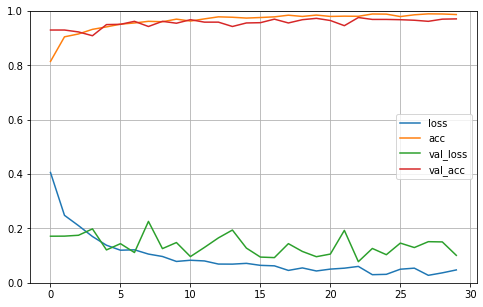

In [16]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
hist_df = pd.DataFrame(history.history)

In [18]:
hist_csv_file = 'history.csv'
with open(hist_csv_file,mode = 'w') as f:
    hist_df.to_csv(f)

In [32]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [21]:
model.evaluate(test_generator,steps = 50)

50/50 [==============================] - 80s 2s/step - loss: 0.1585 - acc: 0.9620


[0.15851829946041107, 0.9620000123977661]

In [37]:
x=model.predict(test_generator,steps = 50)

In [38]:
x

array([[1.00000000e+00],
       [1.78272426e-02],
       [1.19681403e-07],
       [3.66733587e-07],
       [3.30567273e-05],
       [1.00000000e+00],
       [9.57587349e-15],
       [9.99989867e-01],
       [1.00000000e+00],
       [9.99998808e-01],
       [8.17894797e-13],
       [1.31037943e-12],
       [7.64101744e-03],
       [1.00000000e+00],
       [1.11365318e-03],
       [6.22450843e-16],
       [3.97503376e-04],
       [1.00000000e+00],
       [1.20301283e-05],
       [2.39412147e-15],
       [1.00000000e+00],
       [1.73661709e-02],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.60181243e-12],
       [1.65641308e-04],
       [9.99998808e-01],
       [1.00000000e+00],
       [1.46498680e-02],
       [3.38164544e-12],
       [9.99467015e-01],
       [1.00000000e+00],
       [2.15858221e-04],
       [1.55087401e-10],
       [9.99999702e-01],
       [1.00000000e+00],
       [4.40132091e-08],
       [4.28141439e-10],
       [9.99964178e-01],
       [9.54789048e-09],


In [43]:
np.shape(x)

(1000, 1)

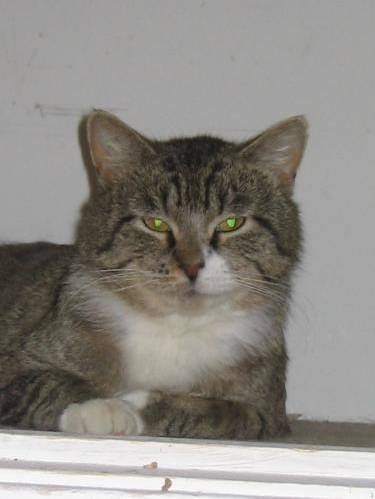

In [59]:
from IPython import display
display.Image("F:/project/test/cats/cat.1519.jpg")


In [1]:
predict("F:/project/test/cats/cat.1519.jpg")

NameError: name 'predict' is not defined

In [66]:
img = os.imread('F:/project/test/cats/cat.1519.jpg')

AttributeError: module 'os' has no attribute 'imread'